## Desarrollo de una Pokedex

In [ ]:
from tensorflow import keras
from tensorflow.keras.applications import VGG16, imagenet_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img #, image_dataset_from_directory
import matplotlib.pyplot as plt
import imageio as io
import numpy as np
from google.colab import drive
from keras.utils import to_categorical
from tensorflow.keras import optimizers
from sklearn.metrics import classification_report
from keras.optimizers import Adam

from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD



drive.mount('/content/drive')

print('Usando real-time data augmentation.')
datagen_train = ImageDataGenerator( 
    rescale = 1./255,
    rotation_range=int(180*0.1),  
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    zoom_range=0.1, 
    horizontal_flip=True, 
    validation_split=0.2,
    )



path = "/content/drive/My Drive/DeepLearning/Sesion7/dataset"
pathTest = "/content/drive/My Drive/DeepLearning/Sesion7/examples"
trainX = datagen_train.flow_from_directory(directory = path, target_size = (32,32), color_mode = "rgb", subset="training")
valX = datagen_train.flow_from_directory(directory = path, target_size = (32,32), color_mode = "rgb", subset = "validation")
testX = datagen_train.flow_from_directory(directory = pathTest, target_size = (32,32), color_mode = "rgb")
#class_mode will be categorical one hot encoding 2D
# dictionary: y_label = train_gen.class_indices
y_label = ["squirtle", "pikachu", "mewtwo", "charmander", "bulbasaur"]
trainY = trainX.classes
valY = valX.classes
testY = testX.classes

#X_train = imagenet_utils.preprocess_input(X_train) #(X)
#valX = imagenet_utils.preprocess_input(valX) #(X)


# Tenemos:  trainX, trainY
#           testX, testY
#           valX, valY

def deep_CNN(width, height, depth, classes, batchNorm):
  
  # Definimos entradas en modo "channels last"
  inputs = Input(shape=(height, width, depth)) #(X)
    
  # Definimos la arquitectura
  # Primer set de capas CONV => RELU => CONV => RELU => POOL
  x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(inputs) #(X)
  if batchNorm: 
    x1 = BatchNormalization()(x1) #(X)
  x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(x1) #(X)
  if batchNorm:
    x1 = BatchNormalization()(x1) #(X)
  x1 = MaxPooling2D(pool_size=(2, 2))(x1) #(X)
  x1 = Dropout(0.25)(x1) #(X)
  
  # Segundo set de capas CONV => RELU => CONV => RELU => POOL
  x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1) #(X)
  if batchNorm: #(X)
    x2 = BatchNormalization()(x2) #(X)
  x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2) #(X)
  if batchNorm:
    x2 = BatchNormalization()(x2) #(X)
  x2 = MaxPooling2D(pool_size=(2, 2))(x2) #(X)
  x2 = Dropout(0.25)(x2) #(X)
  
  # Primer (y único) set de capas FC => RELU
  xfc = Flatten()(x2) #(X)
  xfc = Dense(512, activation="relu")(xfc) #(X)
  if batchNorm:
    xfc = BatchNormalization()(xfc) #(X)
  xfc = Dropout(0.5)(xfc) #(X)
  # Clasificador softmax
  predictions = Dense(classes, activation="softmax")(xfc) #(X)
  
  # Unimos las entradas y el modelo mediante la función Model con parámetros inputs y ouputs (Consultar la documentación)
  model = Model(inputs=inputs, outputs=predictions) #(X)
  
  # La función debe devolver el modelo como salida           
  return model

# Compilar el modelo
print("[INFO]: Compilando el modelo...")
# Instanciamos el modelo ajustado al dataset CIFAR10
model = deep_CNN(width=224, height=2, depth=3, classes=5, batchNorm=True) #(X)
# Compilamos el modelo
model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=0.01, decay=0.01/50, momentum=0.9, nesterov=True), metrics=["accuracy"]) # sin one hot

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
#H = model.fit(trainX, trainY, validation_split=0.2, batch_size=64, epochs=50, verbose=1) 
H = model.fit(trainX, validation_data = (valX), epochs = 50, batch_size=32)

drive.mount('/content/drive') #(X)
# Almacenamos el modelo empleando la función mdoel.save de Keras
model.save("/content/drive/My Drive/DeepLearning/Sesion7/deepCNN_pokedex.h5") #(X)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Usando real-time data augmentation.
Found 937 images belonging to 5 classes.
Found 230 images belonging to 5 classes.
Found 0 images belonging to 0 classes.
[INFO]: Compilando el modelo...
[INFO]: Entrenando la red...
Epoch 1/50
17/30 [================>.............] - ETA: 1:51 - loss: 2.1296 - accuracy: 0.3564

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


30/30 [==============================] - 313s 10s/step - loss: 1.9036 - accuracy: 0.4233 - val_loss: 36.1312 - val_accuracy: 0.2043
Epoch 2/50
30/30 [==============================] - 28s 931ms/step - loss: 0.9956 - accuracy: 0.7063 - val_loss: 14.9202 - val_accuracy: 0.3000
Epoch 3/50
30/30 [==============================] - 28s 915ms/step - loss: 1.0064 - accuracy: 0.7292 - val_loss: 5.6152 - val_accuracy: 0.5043
Epoch 4/50
30/30 [==============================] - 27s 915ms/step - loss: 0.7832 - accuracy: 0.7433 - val_loss: 1.5581 - val_accuracy: 0.5565
Epoch 5/50
30/30 [==============================] - 27s 914ms/step - loss: 0.8734 - accuracy: 0.7555 - val_loss: 0.3027 - val_accuracy: 0.8783
Epoch 6/50
30/30 [==============================] - 27s 909ms/step - loss: 0.6505 - accuracy: 0.8024 - val_loss: 0.4662 - val_accuracy: 0.8783
Epoch 7/50
30/30 [==============================] - 27s 913ms/step - loss: 0.5843 - accuracy: 0.8079 - val_loss: 0.3501 - val_accuracy: 0.8739
Epoch 8/5

Mounted at /content/drive
(450, 600, 3)


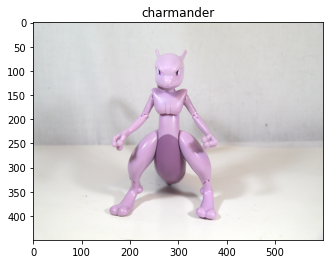

[INFO]: Clasificando imagen...
[[1.4278310e-03 9.1401267e-07 9.9856657e-01 4.8130896e-06 1.7081053e-08]]


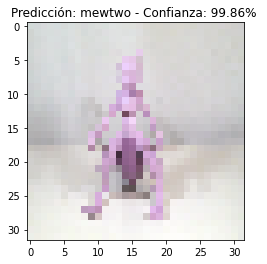

(600, 600, 3)


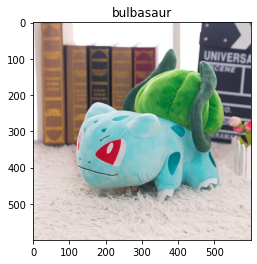

[INFO]: Clasificando imagen...


NameError: ignored

In [1]:
# Desarrollo de una Pokedex
from tensorflow import keras
from vis.utils import utils
from tensorflow.keras.applications import VGG16, imagenet_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img #, image_dataset_from_directory
import matplotlib.pyplot as plt
import imageio as io
import cv2
import numpy as np
from google.colab import drive
from keras.utils import to_categorical
from tensorflow.keras import optimizers
from sklearn.metrics import classification_report
from keras.optimizers import Adam

from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import load_model

if 'model' not in locals():
  # Montamos la unidad de Drive
  drive.mount('/content/drive') #(X)
  # Cargamos el modelo empleando la función load_model
  model2 = load_model("/content/drive/My Drive/DeepLearning/Sesion7/deepCNN_pokedex.h5")

img_path1 = "/content/drive/My Drive/DeepLearning/Sesion7/examples/pikachu_toy.png" # Path de Drive donde tengo la imagen (incluido el nombre de la misma) #(X)
img_path2 = "/content/drive/My Drive/DeepLearning/Sesion7/examples/squirtle_plush.png"
img_path3 = "/content/drive/My Drive/DeepLearning/Sesion7/examples/mewtwo_toy.png"
img_path4 = "/content/drive/My Drive/DeepLearning/Sesion7/examples/charmander_hidden.png"
img_path5 = "/content/drive/My Drive/DeepLearning/Sesion7/examples/charmander_counter.png"
img_path6 = "/content/drive/My Drive/DeepLearning/Sesion7/examples/bulbasaur_plush.png"

img_test1 = cv2.imread(img_path3, cv2.IMREAD_COLOR) # Leo imagen con OPENCV
img_test1 = cv2.cvtColor(img_test1,cv2.COLOR_BGR2RGB) # Por defecto la carga en BGR, la convierto a RGB

# Muestro información de la imagen y hago la predicción sacando resultados
print(img_test1.shape)
plt.imshow(img_test1)
plt.title('charmander')
plt.show()

# Pre-procesamos tal y como he hecho para la fase de entrenamiento con las muestras de CIFAR10
img_test1 = img_test1.astype("float") / 255.0 #(X)
# Re-escalamos la imagen al tamaño con el que fue entrenada la red (comando cv2.resize)
img_test_res1 = cv2.resize(img_test1, (32, 32)) #(X)
# Predecimos la imagen pasando como parámetros a la función predict_image: la imagen, el modelo y string con el GT
output = img_test_res1.copy() #(X)
  # Expandimos las dimensiones (32, 32, 3) a (1, 32, 32, 3)
image = np.expand_dims(img_test_res1, axis=0) #(X)

# Clasificación de la imagen empleando el modelo
print("[INFO]: Clasificando imagen...")
y_labels = ["bulbasaur", "charmander","mewtwo", "pikachu", "squirtle"]
# Realizamos la predicción
proba = model2.predict(image) #(X)
print(proba)
# Nos quedamos con la clase que presente una probabilidad mayor y buscamos la etiqueta en el vector labelNames
idx = np.argmax(proba) #(X)
label = y_labels[idx] #(X)
#gt = labelNames[testY[num_img][0]] #(X)

  # Mostrando imagen e información
#label = "Predicción: {} - Confianza: {:.2f}% - Ground Truth: {}".format(label, proba[0][idx] * 100, gt)
label = "Predicción: {} - Confianza: {:.2f}% ".format(label, proba[0][idx] * 100)
plt.imshow(output)
plt.title(label)
plt.show()


# EJEMPLO 2
img_test2 = cv2.imread(img_path6, cv2.IMREAD_COLOR) # Leo imagen con OPENCV
img_test2 = cv2.cvtColor(img_test2,cv2.COLOR_BGR2RGB) # Por defecto la carga en BGR, la convierto a RGB

# Muestro información de la imagen y hago la predicción sacando resultados
print(img_test2.shape)
plt.imshow(img_test2)
plt.title('bulbasaur')
plt.show()

# Pre-procesamos tal y como he hecho para la fase de entrenamiento con las muestras de CIFAR10
img_test2 = img_test2.astype("float") / 255.0 #(X)
# Re-escalamos la imagen al tamaño con el que fue entrenada la red (comando cv2.resize)
img_test_res2 = cv2.resize(img_test2, (32, 32)) #(X)
# Predecimos la imagen pasando como parámetros a la función predict_image: la imagen, el modelo y string con el GT
output2 = img_test_res2.copy() #(X)
  # Expandimos las dimensiones (32, 32, 3) a (1, 32, 32, 3)
image2 = np.expand_dims(img_test_res2, axis=0) #(X)

# Clasificación de la imagen empleando el modelo
print("[INFO]: Clasificando imagen...")
y_labels = ["bulbasaur", "charmander","mewtwo", "pikachu", "squirtle"]
# Realizamos la predicción
proba2 = model.predict(image2) #(X)
print(proba2)
# Nos quedamos con la clase que presente una probabilidad mayor y buscamos la etiqueta en el vector labelNames
idx2 = np.argmax(proba2) #(X)
label2 = y_labels[idx2] #(X)
#gt = labelNames[testY[num_img][0]] #(X)

  # Mostrando imagen e información
#label = "Predicción: {} - Confianza: {:.2f}% - Ground Truth: {}".format(label, proba[0][idx] * 100, gt)
label2 = "Predicción: {} - Confianza: {:.2f}% ".format(label2, proba2[0][idx2] * 100)
plt.imshow(output2)
plt.title(label2)
plt.show()